# Evaluation Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.


### 1. 

**Load your zillow dataset.**


In [15]:
import pandas as pd
from wrangle import wrangle_zillow, check_columns
from prepare import encode_county, encode_county, split_data, robust_scaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [3]:
# Import and clean

df = wrangle_zillow()

In [4]:
# No exploration needed, encode county

df = encode_county(df)

In [6]:
# Split before scaling data
 
train, validate, test = split_data(df)

train: 1284141 (60% of 2140235)
validate: 428047 (20% of 2140235)
test: 428047 (20% of 2140235)


In [8]:
# Scale needed values for modeling, in this case, we'll just robust scale them all.

train = robust_scaler(train)
validate = robust_scaler(validate)
test = robust_scaler(test)


### 2.

**Fit a linear regression model (ordinary least squares) and compute yhat, predictions of `prop_value` using only `sqfeet`.**

Modify and add to the code above as necessary for it to work with the zillow dataset.

Here is some sample code to get you started:

```python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
```

In [9]:
from sklearn.linear_model import LinearRegression

df1 = train[['sqfeet','prop_value']]
lr = LinearRegression().fit(df1[['sqfeet']],df1[['prop_value']])
baseline = df1['prop_value'].copy().mean()
df1 = df1.assign(yhat_bl=baseline)
df1 = df1.assign(yhat=lr.predict(df1[['sqfeet']]))

### 3. 

**Plot the residuals for the linear regression model that you made.**

In [10]:
df1 = df1.assign(res_bl = (df1['yhat_bl'] - df1['prop_value']))
df1 = df1.assign(res = (df1['yhat'] - df1['prop_value']))

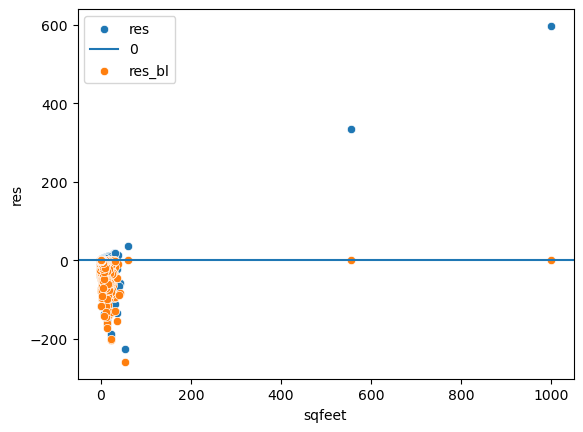

In [13]:
sns.scatterplot(data=df1,x='sqfeet',y='res')
plt.axhline(0)
sns.scatterplot(data=df1,x='sqfeet',y='res_bl')
plt.legend(loc='upper left',labels=['res','0','res_bl'])
plt.show()


### 4. 

**Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.**


In [16]:
# SSE, ESS, TSS, MSE, RMSE

MSE = mean_squared_error(df1.prop_value,df1.yhat)
SSE = MSE*len(df1)
RMSE = MSE**.5
ESS = sum((df1.yhat - baseline)**2)
TSS = ESS + SSE
print("SSE = ", MSE)
print("MSE = ", SSE)
print("RMSE = ", RMSE)
print("ESS = ", ESS)
print("TSS = ", TSS)

SSE =  3.18618251853696
MSE =  4091507.6055365703
RMSE =  1.784988100390857
ESS =  950017.7892181757
TSS =  5041525.394754746



### 5. 

**Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).**


In [17]:
# SSE, MSE, RMSE

MSE_bl = mean_squared_error(df1.prop_value,df1.yhat_bl)
SSE_bl = MSE_bl*len(df1)
RMSE_bl = MSE_bl**.5
print("SSE_bl = ", SSE_bl)
print("MSE_bl = ", MSE_bl)
print("RMSE_bl = ", RMSE_bl)

SSE_bl =  5041525.394753288
MSE_bl =  3.9259905218767157
RMSE_bl =  1.9814112450162171



### 6. 

**Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.**


In [18]:
metrics = pd.DataFrame({'metric':['SSE','MSE','RMSE']
                        ,'error':[SSE,MSE,RMSE]
                        ,'bl':[SSE_bl,MSE_bl,RMSE_bl]})
metrics = metrics.assign(delta=(metrics.error - metrics.bl))
metrics = metrics.assign(better=(metrics.delta<0))
metrics

,metric,error,bl,delta,better
0,SSE,4.091508e+06,5.041525e+06,-950017.789217,True
1,MSE,3.186183e+00,3.925991e+00,-0.739808,True
2,RMSE,1.784988e+00,1.981411e+00,-0.196423,True



### 7. 

**What is the amount of variance explained in your model?**


In [19]:
evs = explained_variance_score(df1.prop_value,df1.yhat)
print('Variance = ', round(evs,3))

Variance =  0.188



### 8. 

**Is your model better than the baseline model?**

In [22]:
df2 = validate[['sqfeet','prop_value']]
df2 = df2.assign(yhat_bl=baseline)
df2 = df2.assign(yhat=lr.predict(df2[['sqfeet']]))

df3 = validate[['sqfeet','prop_value']]
df3 = df3.assign(yhat_bl=baseline)
df3 = df3.assign(yhat=lr.predict(df3[['sqfeet']]))

In [23]:
y='prop_value'
yhat='yhat'
tr_MSE = mean_squared_error(df1[y],df1[yhat])
tr_SSE = tr_MSE*len(df1)
tr_RMSE = tr_MSE**.5
tr_MSE_bl = mean_squared_error(df1[y],df1[yhat])
tr_SSE_bl = tr_MSE_bl*len(df1)
tr_RMSE_bl = tr_MSE_bl**.5
print('Train Model SSE better than baseline: ',tr_SSE - tr_SSE_bl < 1)
print('Train Model MSE better than baseline: ',tr_MSE - tr_MSE_bl < 1)
print('Train Model RMSE better than baseline: ',tr_RMSE - tr_RMSE_bl < 1)
v_MSE = mean_squared_error(df2[y],df2[yhat])
v_SSE = v_MSE*len(df2)
v_RMSE = v_MSE**.5
v_MSE_bl = mean_squared_error(df2[y],df2[yhat])
v_SSE_bl = v_MSE_bl*len(df2)
v_RMSE_bl = v_MSE_bl**.5
print('Validate Model SSE better than baseline: ',v_SSE - v_SSE_bl < 1)
print('Validate Model MSE better than baseline: ',v_MSE - v_MSE_bl < 1)
print('Validate Model RMSE better than baseline: ',v_RMSE - v_RMSE_bl < 1)
t_MSE = mean_squared_error(df3[y],df3[yhat])
t_SSE = t_MSE*len(df3)
t_RMSE = t_MSE**.5
t_MSE_bl = mean_squared_error(df3[y],df3[yhat])
t_SSE_bl = t_MSE_bl*len(df3)
t_RMSE_bl = t_MSE_bl**.5
print('Test Model SSE better than baseline: ',t_SSE - t_SSE_bl < 1)
print('Test Model MSE better than baseline: ',t_MSE - t_MSE_bl < 1)
print('Test Model RMSE better than baseline: ',t_RMSE - t_RMSE_bl < 1)

Train Model SSE better than baseline:  True
Train Model MSE better than baseline:  True
Train Model RMSE better than baseline:  True
Validate Model SSE better than baseline:  True
Validate Model MSE better than baseline:  True
Validate Model RMSE better than baseline:  True
Test Model SSE better than baseline:  True
Test Model MSE better than baseline:  True
Test Model RMSE better than baseline:  True


In [28]:
import scipy.stats as stats

slope, intercept, r, p, se = stats.linregress(df1['sqfeet'],df1['prop_value'])
sts = pd.DataFrame([['slope', 'intercept', 'r', 'p', 'se'],[slope, intercept, r, p, se]])
sts

,0,1,2,3,4
0,slope,intercept,r,p,se
1,0.598351,0.231618,0.434095,0.0,0.001096


### 9. 

**Create a file named evaluate.py that contains the following functions.**



- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false